In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import preprocessing, svm,model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedShuffleSplit
from scipy import stats

In [2]:
data=pd.read_csv('final_dataset_2.csv')

In [3]:
data=data.drop(columns=['ilan_tarihi','ilan_no'])

In [17]:
nbh_med=data.groupby("prov")["fiyat"].median()
nbh_med=pd.DataFrame({'prov':nbh_med.index, 'prov_median':nbh_med.values})
nbh_med.head()
data=data.merge(nbh_med,how="left",on="prov")

In [18]:
data

,prov,emlak_tipi,fiyat,m2_brut,m2_net,bina_yasi,bulundugu_kat,kat_sayisi,isitma,banyo_sayisi,...,oturma_oda_sayisi,balkon_0,balkon_1,esyali_0,esyali_1,site_icerisinde_0,site_icerisinde_1,krediye_uygun_0,krediye_uygun_1,prov_median_y
0,istanbul-adalar,2,2200000,250.0,140.0,21,3,3,1,3,...,2.0,0,1,0,1,1,0,0,1,1425000
1,istanbul-adalar,2,650000,140.0,130.0,26,3,4,1,2,...,1.0,0,1,0,1,1,0,0,1,1425000
2,istanbul-adalar,5,1400000,120.0,110.0,31,3,2,15,1,...,1.0,0,1,0,1,1,0,0,1,1425000
3,istanbul-adalar,8,2788600,382.0,350.0,31,3,3,1,4,...,2.0,0,1,0,1,1,0,0,1,1425000
4,istanbul-adalar,5,1600000,150.0,138.0,26,3,2,1,4,...,2.0,0,1,1,0,1,0,0,1,1425000
5,istanbul-adalar,2,750000,133.0,118.0,26,3,3,1,2,...,1.0,0,1,1,0,1,0,0,1,1425000
6,istanbul-adalar,5,900000,201.0,25.0,31,3,1,15,1,...,0.0,0,1,1,0,1,0,1,0,1425000
7,istanbul-adalar,2,665000,125.0,112.0,11,2,3,1,2,...,1.0,0,1,1,0,1,0,0,1,1425000
8,istanbul-adalar,4,28750000,350.0,340.0,11,2,3,1,5,...,NaN,0,1,1,0,1,0,0,1,1425000
9,istanbul-adalar,5,1225000,130.0,120.0,31,2,2,11,2,...,1.0,0,1,1,0,1,0,0,1,1425000


In [6]:
data=data.replace({'krediye_uygun':'evet'},1)
data=data.replace({'krediye_uygun':'hayir'},0)
data=data.replace({'krediye_uygun':['belirtilmemis','-999','bilinmiyor']},0)

data=data.replace({'site_icerisinde':'evet'},1)
data=data.replace({'site_icerisinde':'hayir'},0)
data=data.replace({'site_icerisinde':['belirtilmemis','-999']},0)

data=data.replace({'esyali':'evet'},1)
data=data.replace({'esyali':'hayir'},0)
data=data.replace({'esyali':['belirtilmemis','-999']},0)


data=data.replace({'balkon':'var'},1)
data=data.replace({'balkon':'hayir'},0)
data=data.replace({'balkon':['belirtilmemis','-999','yok']},0)

In [7]:
data=data.replace({'banyo_sayisi':['belirtilmemis','0','yok']},0)
data["banyo_sayisi"]=data["banyo_sayisi"].replace('6uzeri', 7)
data["banyo_sayisi"]=pd.to_numeric(data["banyo_sayisi"],errors='ignore')
data["banyo_sayisi"].unique()

array([3, 2, 1, 4, 5, 6, 7, 8, 0, 9])

In [8]:
data["kat_sayisi"]=data["kat_sayisi"].replace('30veuzeri', 35)
data["kat_sayisi"]=pd.to_numeric(data["kat_sayisi"],errors='ignore')
data["kat_sayisi"].unique()

array([ 3,  4,  2,  1,  5, 21,  6, 10, 11,  7,  8, 15, 12,  9, 14, 13, 18,
       16, 35, 40, 27, 22, 29, 31, 23, 24, 52, 19, 17, 26, 51, 20, 41, 25,
       30, 33, 38, 28, 34, 32, 55, 36, 54, 42, 48,  0, 44, 37, 45, 50, 39,
       43, 46, 47])

In [9]:
data["bulundugu_kat"]=(data["bulundugu_kat"].replace("30veuzeri", 35).replace("yuksekgiris", 1).replace("bahcekati", 0)
                      .replace("giriskati", 0).replace("catikati", 300).replace("villatipi", 0).replace("kot1", 1)
                     .replace("zeminkat", 0).replace("mustakil", 0).replace("bodrumkat", -1).replace("kot4", 3).replace("kot3", 2).replace("kot2", 1).replace(112, 12).replace("-999", 0))
data["bulundugu_kat"].replace(300,data["kat_sayisi"],inplace=True)
data["bulundugu_kat"]=pd.to_numeric(data["bulundugu_kat"],errors='ignore')
data["bulundugu_kat"].unique()

array([ 3,  2,  1,  4,  0,  5,  6,  7,  8, -1, 10,  9, 12, 14, 11, 18, 17,
       19, 35, 15, 22, 20, 28, 16, 13, 21, 47, 50, 25, 33, 24, 23, 26, 34,
       27, 29, 52, 48, 32, 30, 36, 31, 40, 39, 42, 37, 41])

In [10]:

bina_yasimap={'21-25arasi':21, '26-30arasi':26, '31veuzeri':31, '11-15arasi':11, '16-20arasi':16, '4':4,
 '5-10arasi':7, '9':9, '2':2, '0':0, '1':1, '3':3, '6':6, '5':5, '10':10, '15':15, '8':8, '7':7, '11':11, '17':17, '12':12,
 '14':14, '21':21, '30':30, '19':19, '18':18, '24':24, '20':20, '16':16, '22':22, '29':29}

data=data.replace({'bina_yasi':bina_yasimap})

In [11]:
data["oda_sayisi"].unique()

array(['4+2', '3+1', '9+2', '5+2', '4+1', 'studyo_1+0', '10', '2+1',
       '3+2', '6+1', '2+0', '3', '8+2', '5+1', '10uzeri', '9+3', '7+3',
       '19', '6', '12', '2+2', '14', '4', '2', '6+2', '7', '18', '8',
       '15', '5', '7+2', '9', '6+3', '5+3', '1+1', '8+1', '8+4', '7+1',
       '1.5+1', '10+2', '5+4', '9+4', '1', '4+3', '0', '3.5+1', '2.5+1',
       '4.5+1', '40', '8+3', '21', '4+4', '13', '11', '35+1', '25+1',
       '10+1', '15+1', '45+1', '9+1', '9+5', '24', '9+6', '16', '17'],
      dtype=object)

In [12]:
data["oda_sayisi"]=data["oda_sayisi"].replace("studyo_1+0", "1 + 0")

data["oda_sayisi_oda"]=data["oda_sayisi"].str.split('+', expand=True)[0]
data["oturma_oda_sayisi"] = data["oda_sayisi"].str.split('+', expand=True)[1]

data["oda_sayisi_oda"]=data["oda_sayisi_oda"].replace('10uzeri', 11)
data["oda_sayisi_oda"]=pd.to_numeric(data["oda_sayisi_oda"],errors='ignore')
data["oturma_oda_sayisi"]=pd.to_numeric(data["oturma_oda_sayisi"],errors='ignore')

del data["oda_sayisi"]

In [13]:
data["oda_sayisi_oda"].unique()

array([ 4. ,  3. ,  9. ,  5. ,  1. , 10. ,  2. ,  6. ,  8. , 11. ,  7. ,
       19. , 12. , 14. , 18. , 15. ,  1.5,  0. ,  3.5,  2.5,  4.5, 40. ,
       21. , 13. , 35. , 25. , 45. , 24. , 16. , 17. ])

In [15]:
l5=data['isitma'].unique()
isitmamap = dict([(y,x+1) for x,y in enumerate(sorted(set(l5)))])
data=data.replace({'isitma':isitmamap})

l4=data['emlak_tipi'].unique()
emlak_tipimap = dict([(y,x+1) for x,y in enumerate(sorted(set(l4)))])
data=data.replace({'emlak_tipi':emlak_tipimap})

#l1=data['prov'].unique()
#provmap = dict([(y,x+1) for x,y in enumerate(sorted(set(l1)))])
#data=data.replace({'prov':provmap})


In [16]:
categorical_columns=["balkon","esyali","site_icerisinde","krediye_uygun"]

for i in categorical_columns:
    dummy = pd.get_dummies(data[i],prefix=i)
    data = data.join(dummy)
    data = data.drop(i, axis=1)

In [19]:
data

,prov,emlak_tipi,fiyat,m2_brut,m2_net,bina_yasi,bulundugu_kat,kat_sayisi,isitma,banyo_sayisi,...,oturma_oda_sayisi,balkon_0,balkon_1,esyali_0,esyali_1,site_icerisinde_0,site_icerisinde_1,krediye_uygun_0,krediye_uygun_1,prov_median_y
0,istanbul-adalar,2,2200000,250.0,140.0,21,3,3,1,3,...,2.0,0,1,0,1,1,0,0,1,1425000
1,istanbul-adalar,2,650000,140.0,130.0,26,3,4,1,2,...,1.0,0,1,0,1,1,0,0,1,1425000
2,istanbul-adalar,5,1400000,120.0,110.0,31,3,2,15,1,...,1.0,0,1,0,1,1,0,0,1,1425000
3,istanbul-adalar,8,2788600,382.0,350.0,31,3,3,1,4,...,2.0,0,1,0,1,1,0,0,1,1425000
4,istanbul-adalar,5,1600000,150.0,138.0,26,3,2,1,4,...,2.0,0,1,1,0,1,0,0,1,1425000
5,istanbul-adalar,2,750000,133.0,118.0,26,3,3,1,2,...,1.0,0,1,1,0,1,0,0,1,1425000
6,istanbul-adalar,5,900000,201.0,25.0,31,3,1,15,1,...,0.0,0,1,1,0,1,0,1,0,1425000
7,istanbul-adalar,2,665000,125.0,112.0,11,2,3,1,2,...,1.0,0,1,1,0,1,0,0,1,1425000
8,istanbul-adalar,4,28750000,350.0,340.0,11,2,3,1,5,...,NaN,0,1,1,0,1,0,0,1,1425000
9,istanbul-adalar,5,1225000,130.0,120.0,31,2,2,11,2,...,1.0,0,1,1,0,1,0,0,1,1425000


In [23]:
upper_limit = np.percentile(data["fiyat"].values, 99.7)
buttom_limit = np.percentile(data["fiyat"].values, 1)
data= data.loc[ (data["fiyat"]<=upper_limit)&(data["fiyat"]>=buttom_limit)]

data["fiyat"].describe().astype(int)

count       34466
mean      1000750
std       1770181
min        155000
25%        295000
50%        445000
75%        830000
max      17000000
Name: fiyat, dtype: int64

In [27]:
data["m2_brut"].describe()
buttom_limit = data["m2_brut"].quantile(q=0.0005)
upper_limit = data["m2_brut"].quantile(q=0.9995)
upper_limit
data= data.loc[(data["m2_brut"]<=upper_limit)&(data["m2_brut"]>=buttom_limit)]
data["m2_brut"].describe().astype(int)

count    34337
mean       157
std        151
min         30
25%         90
50%        120
75%        165
max       2400
Name: m2_brut, dtype: int64

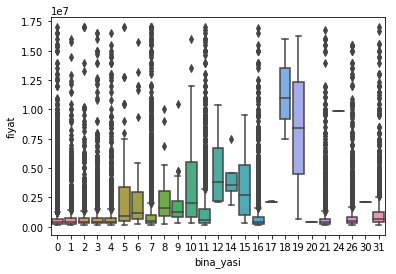

In [28]:
sns.boxplot(x="bina_yasi",y="fiyat",data=data);

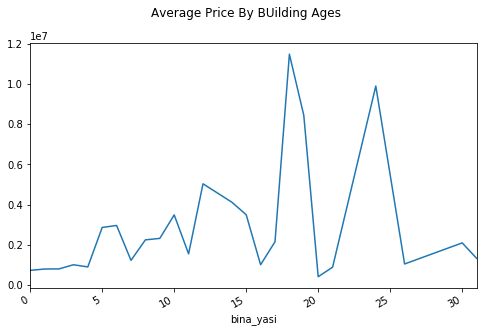

In [29]:
data.groupby(["bina_yasi"])["fiyat"].mean().plot(stacked=True,subplots=(2,1),title="Average Price By BUilding Ages",figsize=(8,5));

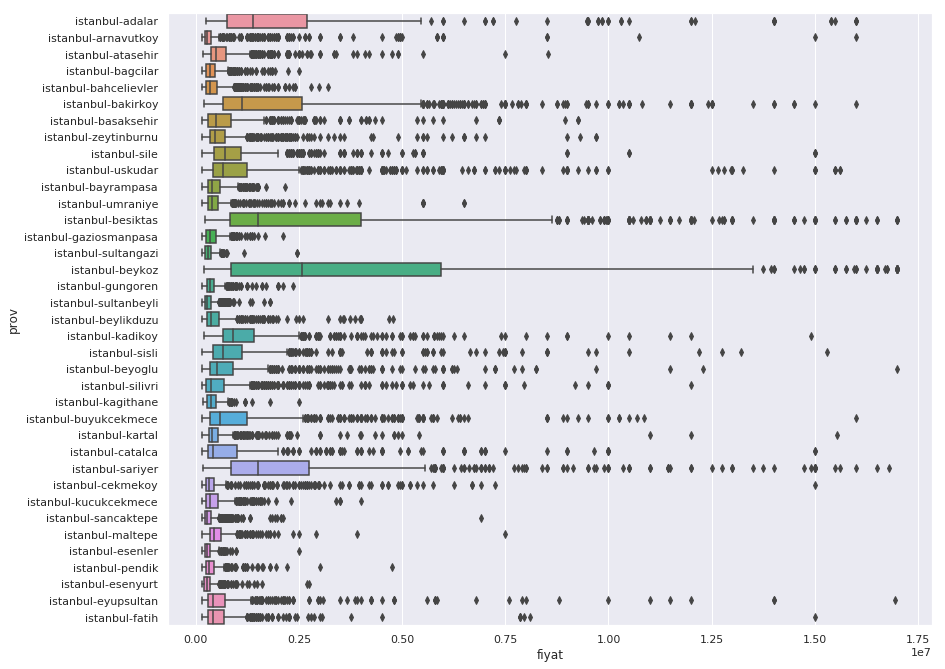

In [30]:
sns.set(rc={'figure.figsize':(13.7,11.27)})

sns.boxplot(y="prov", x="fiyat", data=data)

In [31]:
data["oda_sayisi_oda"].unique()

array([ 4. ,  3. ,  9. ,  5. ,  1. ,  2. ,  6. ,  8. , 11. ,  7. , 12. ,
       14. , 10. , 15. ,  1.5,  0. ,  3.5,  2.5,  4.5, 21. , 35. , 25. ,
       45. , 19. , 24. , 16. ])

In [32]:
data[data["oda_sayisi_oda"]>10][["m2_brut","oda_sayisi_oda","oturma_oda_sayisi","fiyat"]].sort_values("fiyat")

,m2_brut,oda_sayisi_oda,oturma_oda_sayisi,fiyat
12545,90.0,15.0,1.0,160000
33520,65.0,15.0,1.0,175000
26657,70.0,15.0,1.0,180000
23130,72.0,15.0,1.0,182000
33503,65.0,15.0,1.0,185000
21618,85.0,15.0,1.0,190000
33647,75.0,15.0,1.0,200000
29404,105.0,25.0,1.0,215000
32597,90.0,15.0,1.0,215000
16698,95.0,25.0,1.0,220000


In [33]:
data=data.loc[~((data["oda_sayisi_oda"]==15)&(data["m2_brut"]<250))]

In [34]:
data=data.loc[~((data["oda_sayisi_oda"]==25)&(data["m2_brut"]<250))]

In [35]:
data=data.loc[~((data["oda_sayisi_oda"]==35)&(data["m2_brut"]<300))]

In [36]:
data=data.loc[~((data["oda_sayisi_oda"]==45)&(data["m2_brut"]<500))]

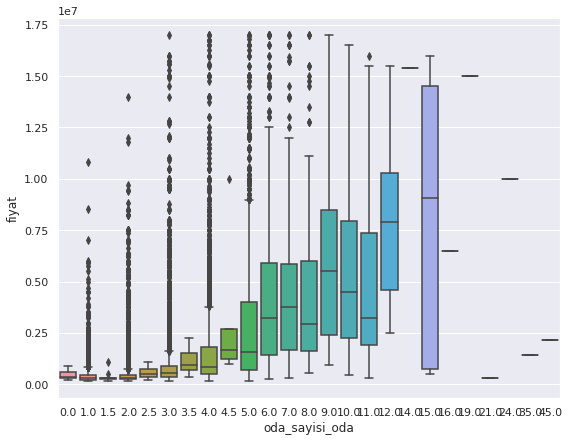

In [37]:
#I prepare seaborn using boxplots, it is just easier
sns.set(rc={'figure.figsize':(9,7)})
sns.boxplot(x="oda_sayisi_oda",y="fiyat",data=data);

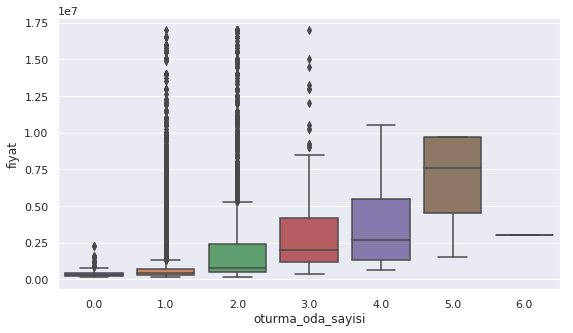

In [38]:
sns.set(rc={'figure.figsize':(9,5)})
sns.boxplot(x="oturma_oda_sayisi",y="fiyat",data=data);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


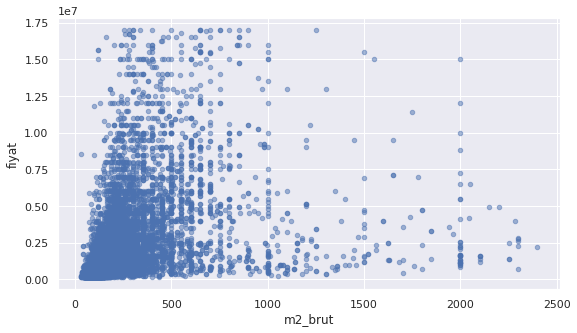

In [39]:
data.plot(kind="scatter",x="m2_brut",y="fiyat",alpha=0.5);

In [40]:
data=data.loc[~((data["m2_brut"]>750)&(data["fiyat"]<222000))]

In [41]:
data.loc[(data["m2_brut"]>750)&(data["fiyat"]<250000)][["m2_brut","oda_sayisi_oda","oturma_oda_sayisi","fiyat"]].sort_values("fiyat")

,m2_brut,oda_sayisi_oda,oturma_oda_sayisi,fiyat


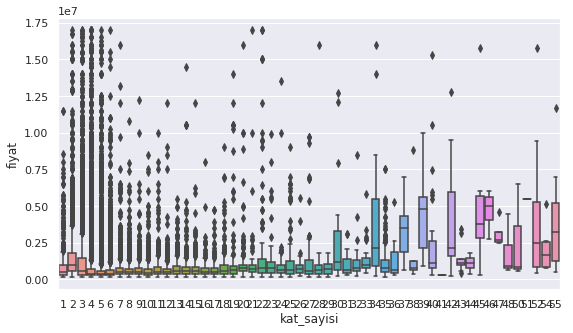

In [42]:
sns.set(rc={'figure.figsize':(9,5)})
sns.boxplot(x="kat_sayisi",y="fiyat",data=data);

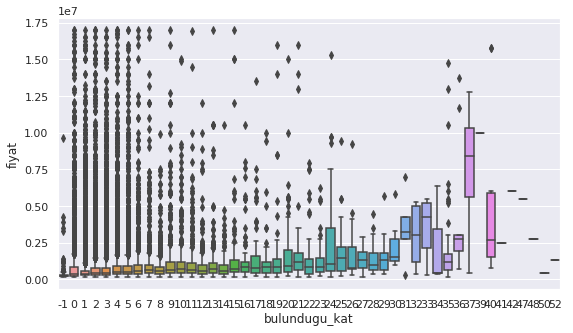

In [43]:
sns.set(rc={'figure.figsize':(9,5)})
sns.boxplot(x="bulundugu_kat",y="fiyat",data=data);

In [44]:
data["kat_orani"]=data.bulundugu_kat/data.kat_sayisi

In [45]:
l1=data['prov'].unique()
provmap = dict([(y,x+1) for x,y in enumerate(sorted(set(l1)))])
data=data.replace({'prov':provmap})


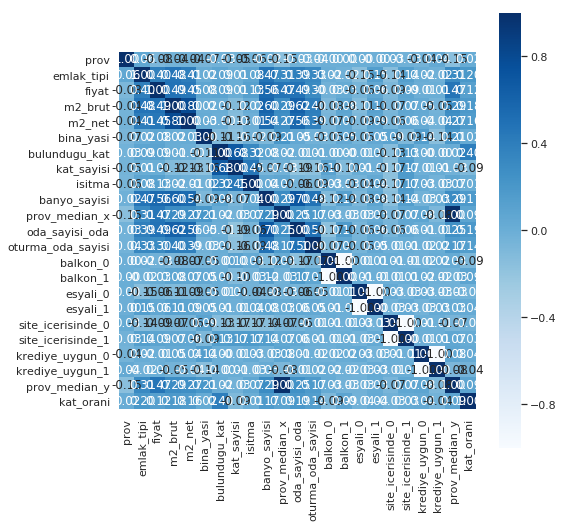

In [46]:
corr = data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 12},cmap= 'Blues');
plt.yticks(rotation=0);
plt.xticks(rotation=90);

In [47]:
data_mat=data.corr()
data_mat['fiyat'].sort_values(ascending=False)

fiyat                1.000000
banyo_sayisi         0.556218
m2_brut              0.491975
oda_sayisi_oda       0.489046
prov_median_x        0.466754
prov_median_y        0.466754
m2_net               0.447989
emlak_tipi           0.395155
oturma_oda_sayisi    0.296919
isitma               0.128132
kat_orani            0.124038
bulundugu_kat        0.094091
site_icerisinde_1    0.089766
bina_yasi            0.080719
esyali_1             0.060558
balkon_1             0.029284
kat_sayisi           0.011090
krediye_uygun_1      0.005246
krediye_uygun_0     -0.005246
balkon_0            -0.029284
esyali_0            -0.060558
prov                -0.083278
site_icerisinde_0   -0.089766
Name: fiyat, dtype: float64

In [48]:
data=data.dropna()
df_y=data['fiyat']
df_x=data.drop(columns=['fiyat'])


from sklearn.model_selection import train_test_split
df_train, df_test, y_train, y_test = train_test_split(df_x, df_y , test_size = 0.30, random_state = 0)

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression



#Fitting default model
linreg = LinearRegression()
linreg.fit(df_train, y_train)





y_pred = linreg.predict(df_test) #y-hat values

#checking r2 score

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.48035409077733293

Text(0.5, 1.0, 'Residual Plots')

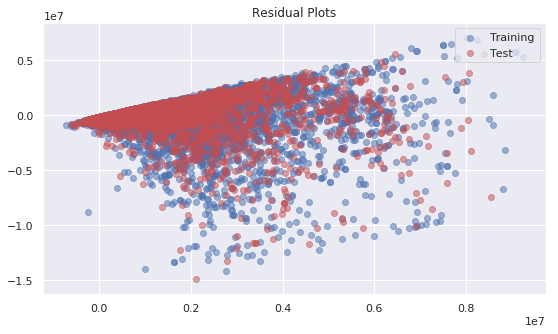

In [49]:
pred_train = linreg.predict(df_train) #Predictions for the training set
pred_test  = linreg.predict(df_test)  #Predictions for the test set
train_res  = plt.scatter(pred_train, (pred_train-y_train), c='b', alpha=0.5)
test_res   = plt.scatter(pred_test, (pred_test-y_test), c='r', alpha=0.5)
plt.legend((train_res, test_res),('Training','Test'),loc='upper right')
plt.title('Residual Plots')

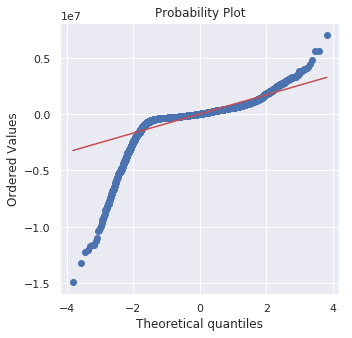

In [50]:
import scipy.stats as stats
residuals = y_pred-y_test #let's try residuals for the test dataset
plt.figure(figsize=(5,5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

In [51]:
ylog = np.log1p(df_y)
df_trainlog, df_testlog, y_trainlog, y_testlog = train_test_split(df_x, ylog, test_size = 0.30, random_state = 0)

In [52]:
linreg = LinearRegression(normalize=False,n_jobs=-1,fit_intercept= True)
linreg.fit(df_trainlog, y_trainlog)





y_predlog = linreg.predict(df_testlog) #y-hat values


from sklearn.metrics import r2_score
r2_score(y_testlog,y_predlog)

0.6354897206579706

In [56]:
np.expm1(linreg.predict(df_test.iloc[250].values.reshape(1, -1)))

array([427385.67985243])

In [57]:
y_test.iloc[250]

310000

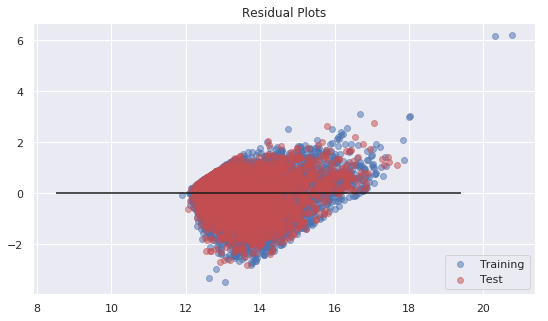

In [58]:
pred_train = linreg.predict(df_trainlog) #Predictions for the training set
pred_test  = linreg.predict(df_testlog)  #Predictions for the test set


train_res  = plt.scatter(pred_train, (pred_train-y_trainlog), c='b', alpha=0.5)
test_res   = plt.scatter(pred_test, (pred_test-y_testlog), c='r', alpha=0.5)
plt.hlines(y=0,xmin=8.5,xmax=19.4)
plt.legend((train_res, test_res),('Training','Test'),loc='lower right')
plt.title('Residual Plots')
plt.show()

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
import lightgbm as lgb

In [69]:
data_1=pd.read_csv('final_dataset_2.csv')

In [70]:
data_1

,ilan_no,ilan_tarihi,prov,emlak_tipi,fiyat,m2_brut,m2_net,oda_sayisi,bina_yasi,bulundugu_kat,kat_sayisi,isitma,banyo_sayisi,balkon,esyali,site_icerisinde,krediye_uygun
0,661287340,15subat2019,istanbul-adalar,satilikdaire,2200000,250.0,140.0,4+2,21-25arasi,3,3,dogalgaz_kombi,3,var,evet,hayir,evet
1,554420413,11subat2019,istanbul-adalar,satilikdaire,650000,140.0,130.0,3+1,26-30arasi,3,4,dogalgaz_kombi,2,var,evet,hayir,evet
2,658157623,08subat2019,istanbul-adalar,satilikmustakilev,1400000,120.0,110.0,3+1,31veuzeri,3,2,yok,1,var,evet,hayir,evet
3,605303147,11subat2019,istanbul-adalar,satilikvilla,2788600,382.0,350.0,9+2,31veuzeri,3,3,dogalgaz_kombi,4,var,evet,hayir,evet
4,597726898,13subat2019,istanbul-adalar,satilikmustakilev,1600000,150.0,138.0,5+2,26-30arasi,3,2,dogalgaz_kombi,4,var,hayir,hayir,evet
5,647034328,13subat2019,istanbul-adalar,satilikdaire,750000,133.0,118.0,4+1,26-30arasi,3,3,dogalgaz_kombi,2,var,hayir,hayir,evet
6,657356684,06subat2019,istanbul-adalar,satilikmustakilev,900000,201.0,25.0,studyo_1+0,31veuzeri,3,1,yok,1,var,hayir,hayir,belirtilmemis
7,657331195,06subat2019,istanbul-adalar,satilikdaire,665000,125.0,112.0,3+1,11-15arasi,kot3,3,dogalgaz_kombi,2,var,hayir,hayir,evet
8,656912289,05subat2019,istanbul-adalar,satilikkosk&konak,28750000,350.0,340.0,10,11-15arasi,kot3,3,dogalgaz_kombi,5,var,hayir,hayir,evet
9,658652665,09subat2019,istanbul-adalar,satilikmustakilev,1225000,130.0,120.0,3+1,31veuzeri,kot3,2,soba,2,var,hayir,hayir,evet


In [71]:
data_1=data_1.drop(columns=['ilan_tarihi','ilan_no'])

In [75]:
data_1=data_1.replace({'krediye_uygun':'evet'},1)
data_1=data_1.replace({'krediye_uygun':'hayir'},0)
data_1=data_1.replace({'krediye_uygun':['belirtilmemis','-999','bilinmiyor']},0)

data_1=data_1.replace({'site_icerisinde':'evet'},1)
data_1=data_1.replace({'site_icerisinde':'hayir'},0)
data_1=data_1.replace({'site_icerisinde':['belirtilmemis','-999']},0)

data_1=data_1.replace({'esyali':'evet'},1)
data_1=data_1.replace({'esyali':'hayir'},0)
data_1=data_1.replace({'esyali':['belirtilmemis','-999']},0)


data_1=data_1.replace({'balkon':'var'},1)
data_1=data_1.replace({'balkon':'hayir'},0)
data_1=data_1.replace({'balkon':['belirtilmemis','-999','yok']},0)

nbh_med=data_1.groupby("prov")["fiyat"].median()
nbh_med=pd.DataFrame({'prov':nbh_med.index, 'prov_median':nbh_med.values})
nbh_med.head()
data_1=data_1.merge(nbh_med,how="left",on="prov")

data_1=data_1.replace({'banyo_sayisi':['belirtilmemis','0','yok']},0)
data_1["banyo_sayisi"]=data_1["banyo_sayisi"].replace('6uzeri', 7)
data_1["banyo_sayisi"]=pd.to_numeric(data_1["banyo_sayisi"],errors='ignore')
data_1["banyo_sayisi"].unique()

data_1["kat_sayisi"]=data_1["kat_sayisi"].replace('30veuzeri', 35)
data_1["kat_sayisi"]=pd.to_numeric(data_1["kat_sayisi"],errors='ignore')
data_1["kat_sayisi"].unique()

data_1["bulundugu_kat"]=(data_1["bulundugu_kat"].replace("30veuzeri", 35).replace("yuksekgiris", 1).replace("bahcekati", 0)
                      .replace("giriskati", 0).replace("catikati", 300).replace("villatipi", 0).replace("kot1", 1)
                     .replace("zeminkat", 0).replace("mustakil", 0).replace("bodrumkat", -1).replace("kot4", 3).replace("kot3", 2).replace("kot2", 1).replace(112, 12).replace("-999", 0))
data_1["bulundugu_kat"].replace(300,data_1["kat_sayisi"],inplace=True)
data_1["bulundugu_kat"]=pd.to_numeric(data_1["bulundugu_kat"],errors='ignore')
data_1["bulundugu_kat"].unique()

data_1=data_1.replace({'banyo_sayisi':['belirtilmemis','0','yok']},0)
data_1["banyo_sayisi"]=data_1["banyo_sayisi"].replace('6uzeri', 7)
data_1["banyo_sayisi"]=pd.to_numeric(data["banyo_sayisi"],errors='ignore')
data_1["banyo_sayisi"].unique()

data_1["oda_sayisi"]=data_1["oda_sayisi"].replace("studyo_1+0", "1 + 0")

data_1["oda_sayisi_oda"]=data_1["oda_sayisi"].str.split('+', expand=True)[0]
data_1["oturma_oda_sayisi"] = data_1["oda_sayisi"].str.split('+', expand=True)[1]

data_1["oda_sayisi_oda"]=data_1["oda_sayisi_oda"].replace('10uzeri', 11)
data_1["oda_sayisi_oda"]=pd.to_numeric(data_1["oda_sayisi_oda"],errors='ignore')
data_1["oturma_oda_sayisi"]=pd.to_numeric(data_1["oturma_oda_sayisi"],errors='ignore')

del data_1["oda_sayisi"]

l5=data_1['isitma'].unique()
isitmamap = dict([(y,x+1) for x,y in enumerate(sorted(set(l5)))])
data_1=data_1.replace({'isitma':isitmamap})

l4=data_1['emlak_tipi'].unique()
emlak_tipimap = dict([(y,x+1) for x,y in enumerate(sorted(set(l4)))])
data_1=data_1.replace({'emlak_tipi':emlak_tipimap})

l1=data_1['prov'].unique()
provmap = dict([(y,x+1) for x,y in enumerate(sorted(set(l1)))])
data_1=data_1.replace({'prov':provmap})

In [79]:

bina_yasimap={'21-25arasi':21, '26-30arasi':26, '31veuzeri':31, '11-15arasi':11, '16-20arasi':16, '4':4,
 '5-10arasi':7, '9':9, '2':2, '0':0, '1':1, '3':3, '6':6, '5':5, '10':10, '15':15, '8':8, '7':7, '11':11, '17':17, '12':12,
 '14':14, '21':21, '30':30, '19':19, '18':18, '24':24, '20':20, '16':16, '22':22, '29':29}

data_1=data_1.replace({'bina_yasi':bina_yasimap})

In [80]:
from sklearn.preprocessing import LabelEncoder

categorical_features = ['prov', 'emlak_tipi',"krediye_uygun","site_icerisinde","esyali","balkon"]

for i in categorical_features:
    le = LabelEncoder()
    data_1[i] = le.fit_transform(data_1[i])
print(data_1.head())

   prov  emlak_tipi    fiyat  m2_brut  m2_net  bina_yasi  bulundugu_kat  \
0     0           1  2200000    250.0   140.0         21              3   
1     0           1   650000    140.0   130.0         26              3   
2     0           4  1400000    120.0   110.0         31              3   
3     0           7  2788600    382.0   350.0         31              3   
4     0           4  1600000    150.0   138.0         26              3   

   kat_sayisi  isitma  banyo_sayisi  balkon  esyali  site_icerisinde  \
0           3       1           3.0       1       1                0   
1           4       1           2.0       1       1                0   
2           2      15           1.0       1       1                0   
3           3       1           4.0       1       1                0   
4           2       1           4.0       1       0                0   

   krediye_uygun  prov_median_x  prov_median_y  oda_sayisi_oda  \
0              1        1425000        1425000    

In [82]:
y= data_1['fiyat']

In [83]:
data_1.drop("fiyat",inplace=True,axis=1)

In [84]:
df_train, df_test, y_train, y_test = train_test_split(data_1, y, train_size = 0.75, test_size = 0.25, random_state = 4)

In [85]:
lgb_train = lgb.Dataset(data=df_train, label=y_train,  free_raw_data=False)

In [86]:
params = {
    'task': 'predict',
    'boosting_type': 'gbdt',
    'objective': 'regression_l1',
    'metric': 'auc',
    'num_leaves': 300,
    'learning_rate': 0.2,
    'seed': 0
}

In [87]:
categorical_indices = [0,2,6,7]

In [88]:
N_FOLDS = 5
MAX_BOOST_ROUNDS = 50
LEARNING_RATE = .0022
evals_result={}
cv_results = lgb.cv(params, lgb_train, num_boost_round=MAX_BOOST_ROUNDS, nfold=N_FOLDS, 
                    verbose_eval=20, early_stopping_rounds=40,stratified=False)

[20]	cv_agg's auc: 1 + 0
[40]	cv_agg's auc: 1 + 0


In [89]:
gbm = lgb.train(params,
                lgb_train,
                num_boost_round = 50,
                categorical_feature = categorical_indices)

/home/emirhan_ozsoy/ml/venv/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [0, 2, 6, 7]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Current parameters:
 {'task': 'predict', 'boosting_type': 'gbdt', 'objective': 'regression_l1', 'metric': 'auc', 'num_leaves': 300, 'learning_rate': 0.2, 'seed': 0}


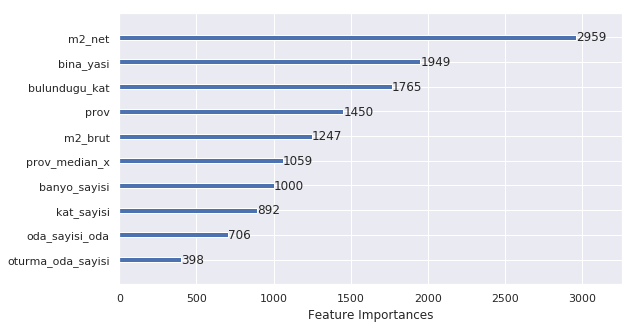

In [90]:
print('Current parameters:\n', params)
ax = lgb.plot_importance(gbm, max_num_features=10)
ax.set_title('')
ax.set_xlabel('Feature Importances')
ax.set_ylabel('')
plt.show()

In [91]:
y_pred = gbm.predict(df_test)

In [92]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.4139684917191906

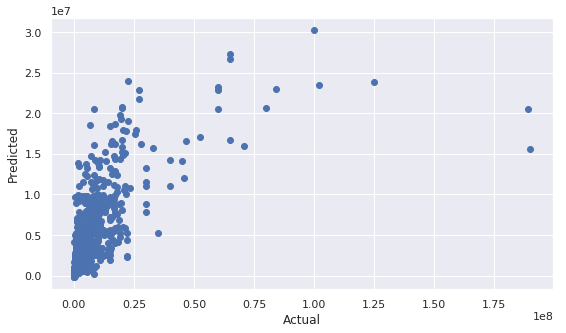

In [93]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()